
# **Convolutional Neural Network (LeNet Architecture code)**
# Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

CIFAR -10 dataset is loaded here. 
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.


For more details of the data set refer below
https://www.cs.toronto.edu/~kriz/cifar.html

**Class torchvision.datasets.CIFAR10**(root: str, train: bool = True, transform: Union[Callable, NoneType] = None, target_transform: Union[Callable, NoneType] = None, download: bool = False) → None *italicised text*

**Parameters**
root (string) – Root directory of dataset where directory cifar-10-batches-py exists or will be saved to if download is set to True.
train (bool, optional) – If True, creates dataset from training set, otherwise creates from test set.
transform (callable, optional) – A function/transform that takes in an PIL image and returns a transformed version. E.g, transforms.RandomCrop
target_transform (callable, optional) – A function/transform that takes in the target and transforms it.
download (bool, optional) – If true, downloads the dataset from the internet and puts it in root directory. If dataset is already downloaded, it is not downloaded again.

**return**

Returns:	(image, target) where target is index of the target class.


In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


Assigning labels to the dataset. As seen in CIFAR-10 dataset link there are 10 labels.

In [ ]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Next we are loading the data into the trainset. Now that data is downloaded locally we can load from it. Batch size indicates in each iteraction how many images from the data to be loaded at a time.shuffle=True indicates everytime images are loaded it is chosen randomly

In [ ]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

## Iterate over the data and Visualise images

Using iter....next we can iterate over the data and can Visualise it

We can try one iteration and try to display sample images. CIFAR 10 is 32x32 size images.dataiter.next() takes the first batch ( 4 images) into images and labels into labels

images.shape is giving torch.Size([4, 3, 32, 32]) where 4 is batch size, 3 is channel size(RGB) and 32x32 is size of image.
image[1].shape gives details of one image. labels.item() gives the label index

In [ ]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
6


## Visualise data
To display image we convert tensor to numpy and use imshow. Transpose is done to rearrange the dimensions from (channel,width,height)(3, 32, 32) to (width height channel) (32,32,3).
figsize made (1,1) for visibility

In [ ]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [ ]:
npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [ ]:
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


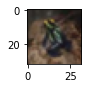

In [ ]:
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [ ]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

Below code displays the image of one batch in one row and labels get displayed

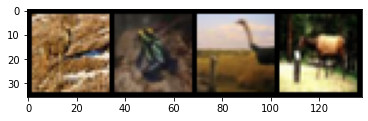

deer frog bird deer


In [ ]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

CLASS torch.nn.Module is the Base class for all neural network modules.

PyTorch provides a nn.Module that build neural networks. super().init() this creates a class that tracks the architecture and provides a lot of useful methods and attributes.

FirstCNN class is inherited from nn module
***super(FirstCNN, self).__init__()*** called the init of the parent class

***self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2))*** declares the convolution operation. parameters are 3- channel, 16- output dimension, 3- size of kernel(3x3), padding and stride

In the forward pass function ***def forward(self, x)*** we use the convolutional layer created.




In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, padding=(1,1), stride=(2,2)) # no: of channels, no: of output feature maps, kernel size,padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

Now instantiate the First CNN and apply it on images

In [ ]:
net = FirstCNN()

***torch.Size([4, 16, 16, 16])***
indicates 4= batch size indicates 4 images at a time is processed. 16 is the dimension of the output ie 16 images are created. Next two 16 indicate the output image dimension 16x16. as we had padding =1 and stride=2. reduced to half.

In [ ]:
out = net(images)
out.shape

torch.Size([4, 16, 16, 16])

We can also print the no of parameters.

**torch.Size([16, 3, 3, 3])** 


As there are 16 kernels , of 3 channels and each kernel of size 3x3. 

***torch.Size([16])***
The above line indicates 16 biases

In [ ]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


Now we can try to visualise the feature maps. Pls note it has some features from the input image.

In [ ]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(16, 16)


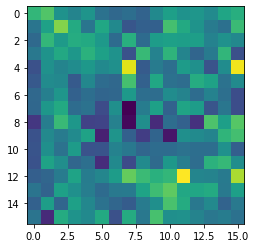

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network
Below code shows a simple CNN with 2 convolutional layer
we are using nn.Sequential which helps in stacking multiple layers. 

***nn.Conv2d(3, 8, 3)***,   
parameters (channel,output dimension,size of kernel) 
indicates a convolutional layer with 3 channels, 8 is the output dimension( 8 output images) and each kernel of size 3x3
Input -> Output  
(N, 3, 32, 32) -> (N, 8, 30, 30) .
N batch size, 3 input channel, 8 output channel.
32x32 is input image dimension . As no padding size of output reduced to 30x30


***nn.Conv2d(8, 16, 3)***
8 channel input ( as output from previous step is 8). 16 output dimension.3x3 size of kernel  
 (N, 8, 30, 30) -> (N, 16, 28, 28)

In [ ]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

Instantiate the above CNN and use the forward pass. See the size of output as expected

In [ ]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

Visualise the Feature maps

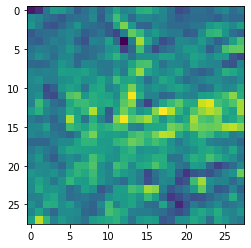

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())

Now we are trying a 3rd version with sandwitching pooling layer with convolution layers. Average pooling is used here. You can also try Max pooling

In [ ]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

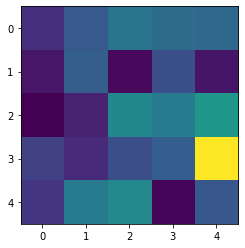

In [ ]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet
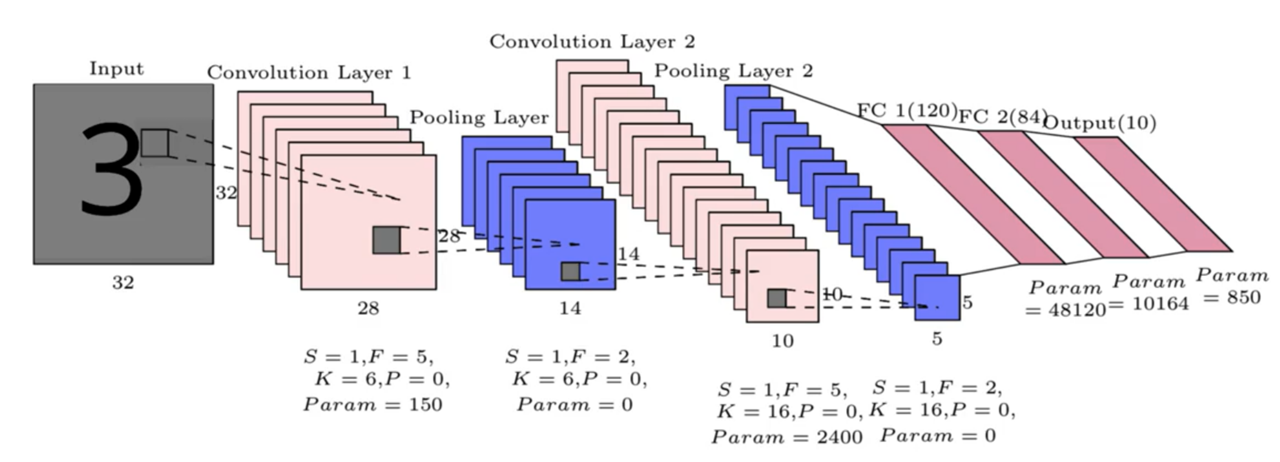

Now we are going to create a Lenet Architecture with 2 convolutional layers, 2 pooling layers and 3 fully connected layers. use sequential to stack convolutional and pooling. Use another sequential stacking for fully connected layer.

            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5) 

  *nn.Conv2d(3, 6, 5)* indicates 3 channel input, 6 channel output, 5x5 kernel. Input image size is 32x32 and output image without padding 28x28. Followed by that activation and average pooling with stride 2. Output image size is now 14x14

 *nn.Conv2d(6, 16, 5)*
channel size is 6, output channel 16, 5x5 kernel.

          self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)

fully connected layer starts with flattened output from convolution-pooling layers ie 16x16x5 is flattened to get 400 size 1 D vector. This is done in the forward function.

In the forward function each of the sequential stack is executed. Look at no: of neirons in the Lenet architecture. Pls note there is a flattening operation done after Conv-pooling layer

*x = x.view(x.size(0), -1)* does the flattening operation and creates 400 size 1D vector.


In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1) # flattening
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [ ]:
net = LeNet()
out = net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
print(out)

tensor([[-3.8752e-02, -6.3401e-02, -7.2410e-02, -9.4299e-02,  3.1369e-02,
          1.9352e-02,  6.0991e-02, -2.0787e-03,  5.4808e-02, -3.0836e-02],
        [-5.1460e-02, -6.2475e-02, -6.4065e-02, -9.5880e-02, -9.2777e-03,
          5.7911e-03,  5.2661e-02, -7.9297e-05,  4.4387e-02, -3.5989e-02],
        [-6.7537e-02, -8.3170e-02, -5.7079e-02, -9.6374e-02,  4.0258e-02,
          1.0800e-02,  4.7094e-02, -1.0884e-02,  8.4221e-02, -1.4246e-02],
        [-1.0039e-02, -6.8486e-02, -6.5945e-02, -1.1197e-01,  2.4713e-02,
          5.0298e-02,  8.2174e-02,  1.4310e-02,  4.9171e-02, -2.8809e-02]],
       grad_fn=<AddmmBackward>)


In [ ]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([6, 6, 6, 6])


## Training LeNet

In [ ]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

Now we are going for a Learning step for LeNet to get the optimal parameters.
Selecting a bigger batch size of 128( better to be power of 2 for optimal GPU computations)

Create Trainset, test set.

Load train data and Test Data using Dataloader

*   Create Trainset, test set.
*   Load train data and Test Data using Dataloader

Testloader can have shuffle =False as it happens only once , so no need of shuffling


In [ ]:
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


An evaluation function is defined to calculate the accuracy.

 Load the data in batches inside the loop, 

 predict the output using *outputs = net(inputs)*

 Get the predicted value by taking maximum confidence
 Calculate the correct predictions and total to get the accuracy
 



In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

Instantiate the LeNet

In [ ]:
net = LeNet()

For Backpropagation create instance of loss function( Cross entropy here). Instantiate optimiser( Adam here) to optimise all the parameters. ( thats why net.parameters)

In [ ]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

# Training Loop
16 epochs

Give an iteration for each load from data loader

        opt.zero_grad()  ** Initialise optimiser. Reset any previous gradients**
        outputs = net(inputs)  **Do the forward pass**
        loss = loss_fn(outputs, labels)   **Do the loss computation **
        loss.backward()   **Backpropagate the loss**
        opt.step()  **Do the step where we update all the parameters**

  For book keeping purpose for storing the loss in each epoch and iteration

  *loss_arr.append(loss.item())*

  *loss_epoch_arr.append(loss.item())*



Epoch: 0/16, Test acc: 37.85, Train acc: 37.97
Epoch: 1/16, Test acc: 43.34, Train acc: 43.42
Epoch: 2/16, Test acc: 46.05, Train acc: 46.77
Epoch: 3/16, Test acc: 49.72, Train acc: 50.64
Epoch: 4/16, Test acc: 51.14, Train acc: 52.93
Epoch: 5/16, Test acc: 52.43, Train acc: 55.04
Epoch: 6/16, Test acc: 53.15, Train acc: 56.03
Epoch: 7/16, Test acc: 53.80, Train acc: 57.73
Epoch: 8/16, Test acc: 53.73, Train acc: 58.38
Epoch: 9/16, Test acc: 54.42, Train acc: 60.00
Epoch: 10/16, Test acc: 54.88, Train acc: 60.70
Epoch: 11/16, Test acc: 54.79, Train acc: 61.74
Epoch: 12/16, Test acc: 56.09, Train acc: 63.00
Epoch: 13/16, Test acc: 55.63, Train acc: 63.98
Epoch: 14/16, Test acc: 56.18, Train acc: 64.70
Epoch: 15/16, Test acc: 56.15, Train acc: 65.46


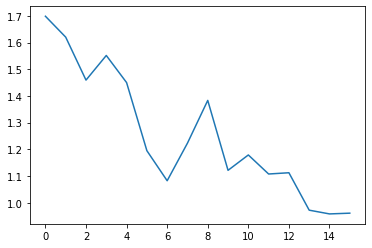

CPU times: user 10min 21s, sys: 5.78 s, total: 10min 27s
Wall time: 10min 25s


In [ ]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

The above result may need some regularisation. Test accuracy is some what saturated. Some over fitting has happened as train error increased beyond that. Some regularisation will help

## Move to GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 37s, sys: 1.97 s, total: 1min 38s
Wall time: 1min 39s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.23, Train acc: 65.33


## Basic Visualisation

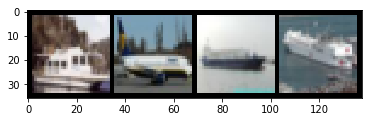

In [ ]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
net = net.to('cpu')

In [ ]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [ ]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

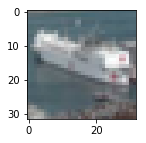

In [ ]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


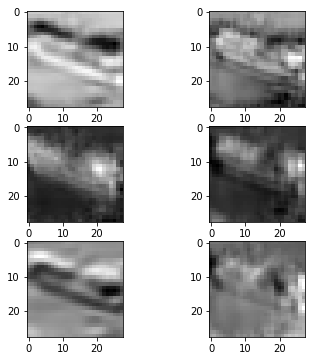

In [ ]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()